In [1]:
import kagglehub

path = kagglehub.dataset_download("behrad3d/nasa-cmaps")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/nasa-cmaps


In [2]:

from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aishwaryas2305","key":"9c862b892daa964be858f89057b80c73"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!pip install -q kaggle


In [5]:
!kaggle datasets download -d behrad3d/nasa-cmaps


Dataset URL: https://www.kaggle.com/datasets/behrad3d/nasa-cmaps
License(s): CC0-1.0


In [6]:
!unzip -q nasa-cmaps.zip -d nasa_cmaps


In [7]:
!ls nasa_cmaps


CMaps


In [8]:
import pandas as pd
import numpy as np

In [9]:
column_names = ['engine', 'time', 'op_setting_1', 'op_setting_2',
                'op_setting_3'] + [f'sm_{i}' for i in range(1, 22)]

In [10]:
train = pd.read_csv("/content/nasa_cmaps/CMaps/train_FD001.txt", sep = ' ' , header=None , names=column_names ,index_col=False )
test = pd.read_csv("/content/nasa_cmaps/CMaps/test_FD001.txt", sep = ' ' , header=None , names=column_names ,index_col=False)
RUL = pd.read_csv("/content/nasa_cmaps/CMaps/RUL_FD001.txt",sep = ' ' , header=None  ,names=["RUL"], index_col=False)

<ipython-input-10-1bae09ce71e7>:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train = pd.read_csv("/content/nasa_cmaps/CMaps/train_FD001.txt", sep = ' ' , header=None , names=column_names ,index_col=False )
<ipython-input-10-1bae09ce71e7>:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  test = pd.read_csv("/content/nasa_cmaps/CMaps/test_FD001.txt", sep = ' ' , header=None , names=column_names ,index_col=False)


In [11]:
train

,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [12]:
min(train['engine'].value_counts().sort_index().values)


np.int64(128)

In [13]:
min(test['engine'].value_counts().sort_index().values)

np.int64(31)

In [14]:
rul_df = train.groupby('engine')['time'].max().reset_index()
rul_df

,engine,time
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


In [15]:
rul_df.columns = ['engine', 'max_cycle']
train = train.merge(rul_df, on='engine', how='left')
train['RUL'] = train['max_cycle'] - train['time']
train.drop(columns=['max_cycle'], inplace=True)

In [16]:
train

,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [17]:
test

,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [18]:
rul_df = test.groupby('engine')['time'].max().reset_index()
rul_df

,engine,time
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98
...,...,...
95,96,97
96,97,134
97,98,121
98,99,97


In [19]:
rul_df.columns = ['engine', 'max_cycle']
test = test.merge(rul_df, on='engine', how='left')
test['RUL'] = test['max_cycle'] - test['time']
test.drop(columns=['max_cycle'], inplace=True)

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine        13096 non-null  int64  
 1   time          13096 non-null  int64  
 2   op_setting_1  13096 non-null  float64
 3   op_setting_2  13096 non-null  float64
 4   op_setting_3  13096 non-null  float64
 5   sm_1          13096 non-null  float64
 6   sm_2          13096 non-null  float64
 7   sm_3          13096 non-null  float64
 8   sm_4          13096 non-null  float64
 9   sm_5          13096 non-null  float64
 10  sm_6          13096 non-null  float64
 11  sm_7          13096 non-null  float64
 12  sm_8          13096 non-null  float64
 13  sm_9          13096 non-null  float64
 14  sm_10         13096 non-null  float64
 15  sm_11         13096 non-null  float64
 16  sm_12         13096 non-null  float64
 17  sm_13         13096 non-null  float64
 18  sm_14         13096 non-nu

In [21]:
RUL

,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [22]:
RUL['engine'] = RUL.index + 1
RUL

,RUL,engine
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5
...,...,...
95,137,96
96,82,97
97,59,98
98,117,99


In [23]:
test = test.merge(RUL, on='engine', how='left')
test

,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL_x,RUL_y
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,30,112
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,29,112
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,28,112
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,27,112
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,26,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,4,20
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,3,20
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,2,20
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,1,20


In [24]:
test['RUL'] = test['RUL_x'] + test['RUL_y']
test.drop(columns=['RUL_x','RUL_y'], inplace=True)
test

,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,24
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,23
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,22
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,21


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine        20631 non-null  int64  
 1   time          20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sm_1          20631 non-null  float64
 6   sm_2          20631 non-null  float64
 7   sm_3          20631 non-null  float64
 8   sm_4          20631 non-null  float64
 9   sm_5          20631 non-null  float64
 10  sm_6          20631 non-null  float64
 11  sm_7          20631 non-null  float64
 12  sm_8          20631 non-null  float64
 13  sm_9          20631 non-null  float64
 14  sm_10         20631 non-null  float64
 15  sm_11         20631 non-null  float64
 16  sm_12         20631 non-null  float64
 17  sm_13         20631 non-null  float64
 18  sm_14         20631 non-nu

In [26]:
train.describe()

,engine,time,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


## Standard deviation

In [27]:
# Drop columns with zero standard deviation
cols_to_drop = train.std(numeric_only=True)[train.std(numeric_only=True) == 0].index
cols_to_drop

Index(['op_setting_3', 'sm_18', 'sm_19'], dtype='object')

In [28]:
train = train.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)

In [29]:
train.isnull().sum()

,0
engine,0
time,0
op_setting_1,0
op_setting_2,0
sm_1,0
sm_2,0
sm_3,0
sm_4,0
sm_5,0
sm_6,0


In [30]:
train.duplicated().sum()

np.int64(0)

#Check for constant or quasi-constant columns

In [31]:
cols_to_drop = []
for col in train.columns:
    top_freq = train[col].value_counts(normalize=True).values[0]
    if top_freq > 0.99:
        print(f"{col} is quasi-constant with {top_freq*100:.2f}% same value")
        cols_to_drop.append(col)


sm_1 is quasi-constant with 100.00% same value
sm_5 is quasi-constant with 100.00% same value
sm_10 is quasi-constant with 100.00% same value
sm_16 is quasi-constant with 100.00% same value


In [32]:
cols_to_drop

['sm_1', 'sm_5', 'sm_10', 'sm_16']

In [33]:

train = train.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)

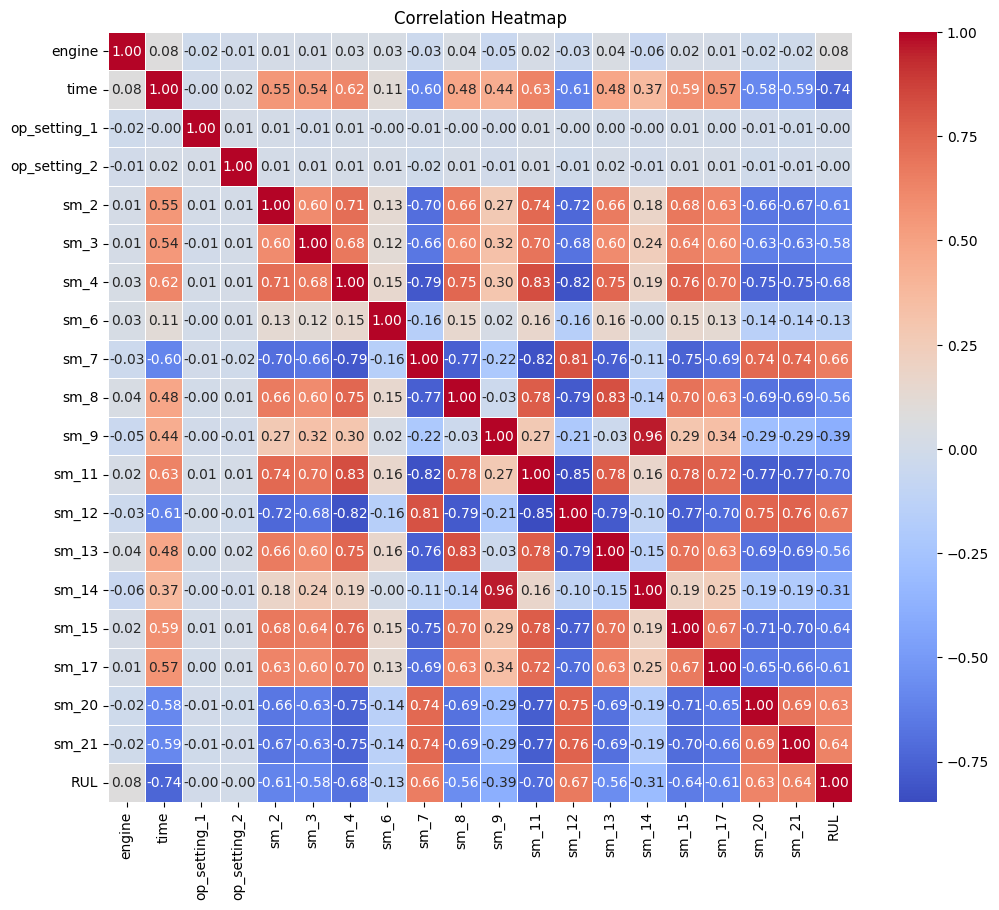

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train.corr(numeric_only=True)

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


In [35]:
import numpy as np

corr_matrix = train.corr(numeric_only=True)

threshold = 0.95

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

for pair in high_corr_pairs:
    print(f"Pair: {pair[0]} and {pair[1]} | Correlation: {pair[2]:.2f}")

cols_to_drop = [pair[1] for pair in high_corr_pairs]

train = train.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)
print(f"Dropped columns: {cols_to_drop}")


Pair: sm_14 and sm_9 | Correlation: 0.96
Dropped columns: ['sm_9']


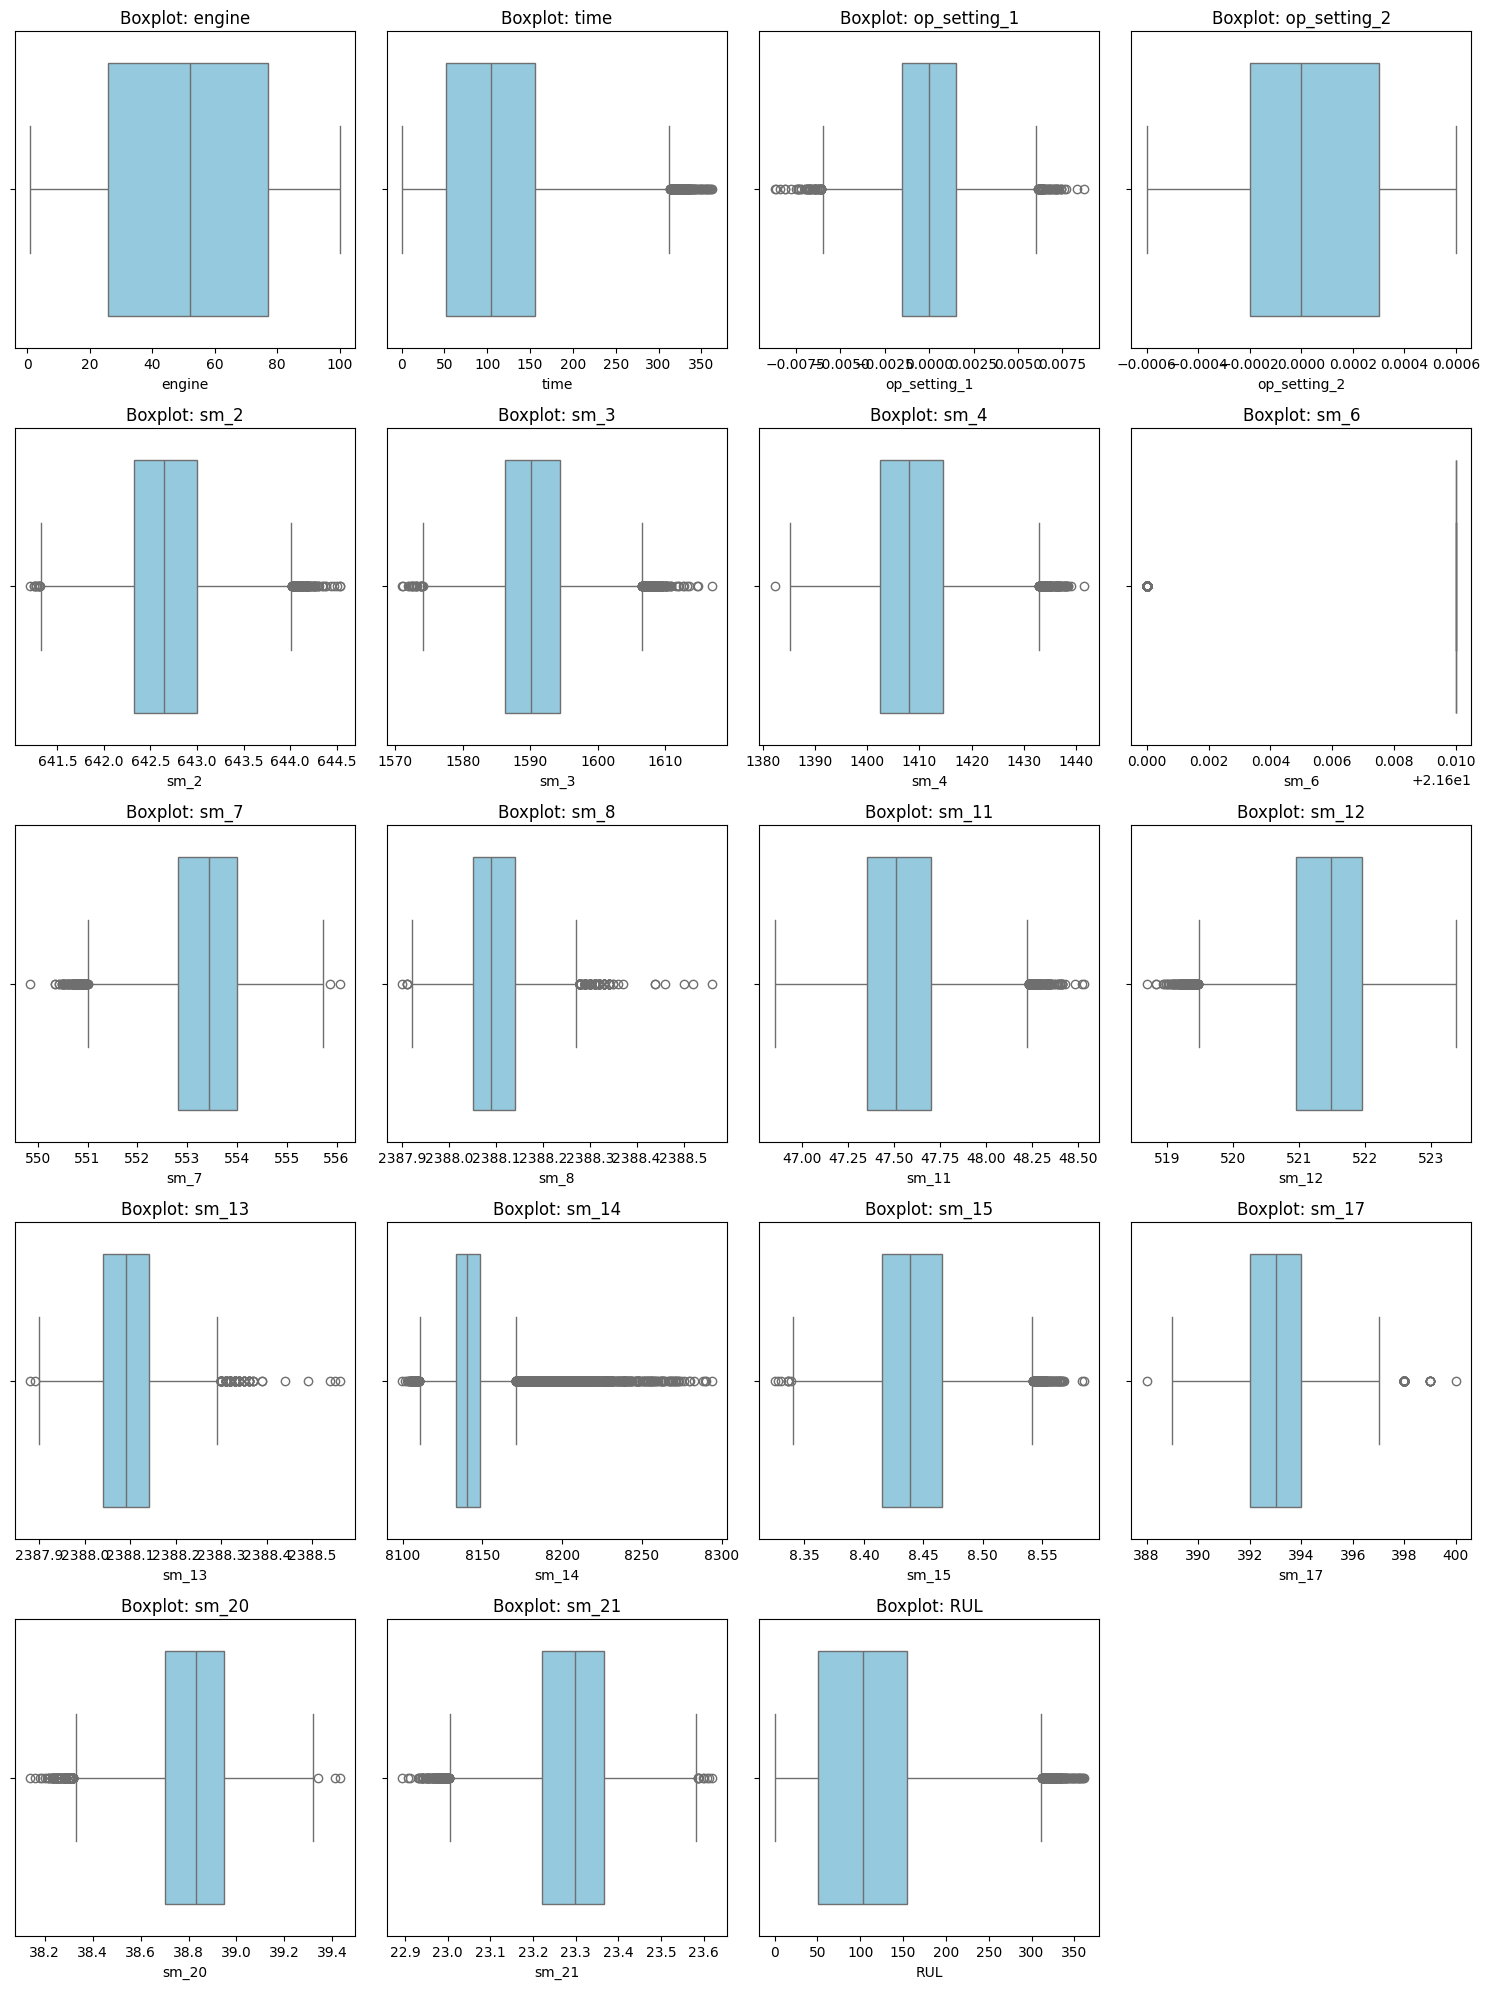

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

num_features = train.shape[1]

rows = (num_features // 4) + 1
plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(train.select_dtypes(include=[np.number]).columns):
    plt.subplot(rows, 4, i + 1)
    sns.boxplot(x=train[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()

plt.show()


## Outlier

In [37]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

outliers = ((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR)))

# Calculate the percentage of outliers for each feature
outlier_percentage = outliers.mean() * 100

print("Percentage of outliers per feature:")
print(outlier_percentage)

# Features with more than 50% outliers
features_to_remove = outlier_percentage[outlier_percentage > 50].index

Percentage of outliers per feature:
engine          0.000000
time            0.504096
op_setting_1    0.508943
op_setting_2    0.000000
sm_2            0.620426
sm_3            0.799767
sm_4            0.581649
sm_6            1.967912
sm_7            0.533178
sm_8            1.551064
sm_11           0.809461
sm_12           0.707673
sm_13           0.780379
sm_14           7.479036
sm_15           0.581649
sm_17           0.392613
sm_20           0.567108
sm_21           0.659202
RUL             0.504096
dtype: float64


In [38]:
features_to_remove

Index([], dtype='object')

In [39]:
train

,engine,time,op_setting_1,op_setting_2,sm_2,sm_3,sm_4,sm_6,sm_7,sm_8,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine        20631 non-null  int64  
 1   time          20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   sm_2          20631 non-null  float64
 5   sm_3          20631 non-null  float64
 6   sm_4          20631 non-null  float64
 7   sm_6          20631 non-null  float64
 8   sm_7          20631 non-null  float64
 9   sm_8          20631 non-null  float64
 10  sm_11         20631 non-null  float64
 11  sm_12         20631 non-null  float64
 12  sm_13         20631 non-null  float64
 13  sm_14         20631 non-null  float64
 14  sm_15         20631 non-null  float64
 15  sm_17         20631 non-null  int64  
 16  sm_20         20631 non-null  float64
 17  sm_21         20631 non-null  float64
 18  RUL           20631 non-nu

In [41]:
test

,engine,time,op_setting_1,op_setting_2,sm_2,sm_3,sm_4,sm_6,sm_7,sm_8,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21,RUL
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,141
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,140
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,139
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,21.61,553.41,2388.02,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974,24
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,21.61,553.22,2388.05,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771,23
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,21.61,553.04,2388.11,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051,22
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,21.61,553.37,2388.07,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699,21


In [42]:
prefixes = ['op_setting_', 'sm_']

# Dynamically select columns starting with specified prefixes, plus 'time'
selected_columns = [col for col in train.columns if any(col.startswith(p) for p in prefixes)]
selected_columns

['op_setting_1',
 'op_setting_2',
 'sm_2',
 'sm_3',
 'sm_4',
 'sm_6',
 'sm_7',
 'sm_8',
 'sm_11',
 'sm_12',
 'sm_13',
 'sm_14',
 'sm_15',
 'sm_17',
 'sm_20',
 'sm_21']

In [43]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sort data by engine and time
train = train.sort_values(by=['engine', 'time'])

# Group by engine
grouped = train.groupby('engine')

sequence_length = 30
X = []
y = []
prefixes = ['op_setting_', 'sm_']

selected_columns = [col for col in train.columns if any(col.startswith(p) for p in prefixes)]

for engine_id, group in grouped:
    for i in range(len(group) - sequence_length):
        sequence = group.iloc[i:i+sequence_length][selected_columns].values
        rul = group.iloc[i+sequence_length-1]['RUL']
        X.append(sequence)
        y.append(rul)


X_train = np.array(X)
y_train = np.array(y)

scaler = MinMaxScaler()
X_train = X_train.reshape(-1, X_train.shape[-1])
X_train = scaler.fit_transform(X_train)
X_train = X_train.reshape(-1, sequence_length, X_train.shape[-1])

In [44]:
test

,engine,time,op_setting_1,op_setting_2,sm_2,sm_3,sm_4,sm_6,sm_7,sm_8,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21,RUL
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,141
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,140
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,139
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,21.61,553.41,2388.02,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974,24
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,21.61,553.22,2388.05,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771,23
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,21.61,553.04,2388.11,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051,22
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,21.61,553.37,2388.07,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699,21


In [45]:

test = test.sort_values(by=['engine', 'time'])

# Group by engine
grouped = test.groupby('engine')

sequence_length = 30
X = []
y = []

count = 0
print(selected_columns)
for engine_id, group in grouped:
    count+=1
    if len(group) >= sequence_length:

        sequence = group.iloc[-sequence_length:][selected_columns].values
        rul = group.iloc[-1]['RUL']
        X.append(sequence)
        y.append(rul)

X_test = np.array(X)
y_test = np.array(y)

X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])
print(X_test_reshaped.shape)
print(X_test_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)
X_test = X_test_scaled.reshape(-1, sequence_length, X_test.shape[-1])

['op_setting_1', 'op_setting_2', 'sm_2', 'sm_3', 'sm_4', 'sm_6', 'sm_7', 'sm_8', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_17', 'sm_20', 'sm_21']
(3000, 16)
[[-2.70000e-03 -3.00000e-04  6.41710e+02 ...  3.93000e+02  3.90200e+01
   2.33916e+01]
 [ 3.00000e-04  1.00000e-04  6.42460e+02 ...  3.93000e+02  3.90800e+01
   2.34166e+01]
 [ 4.20000e-03  0.00000e+00  6.42440e+02 ...  3.91000e+02  3.90000e+01
   2.33737e+01]
 ...
 [-6.00000e-04 -3.00000e-04  6.43440e+02 ...  3.95000e+02  3.86200e+01
   2.32051e+01]
 [-3.80000e-03  1.00000e-04  6.43260e+02 ...  3.95000e+02  3.86600e+01
   2.32699e+01]
 [ 1.30000e-03  3.00000e-04  6.42950e+02 ...  3.96000e+02  3.87000e+01
   2.31855e+01]]


In [46]:
count

100

In [47]:
y_train

array([162., 161., 160., ...,   3.,   2.,   1.])

In [48]:
X_train[17][0]

array([0.32183908, 0.41666667, 0.4246988 , 0.43601482, 0.24653395,
       1.        , 0.70048309, 0.26785714, 0.2208589 , 0.65458422,
       0.31147541, 0.17411852, 0.29973067, 0.33333333, 0.58139535,
       0.69663076])

In [49]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17631, 30, 16)
(17631,)
(100, 30, 16)
(100,)


# LSTM

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout


model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    shuffle=False
)


Epoch 1/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 9441.1436 - val_loss: 9316.6602
Epoch 2/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 5427.8804 - val_loss: 6951.0234
Epoch 3/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 4039.4219 - val_loss: 5998.6279
Epoch 4/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 3581.1921 - val_loss: 5627.8008
Epoch 5/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 3446.3521 - val_loss: 5487.5513
Epoch 6/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 3442.8281 - val_loss: 5431.8877
Epoch 7/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 3397.4563 - val_loss: 5408.4204
Epoch 8/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 3400.6272 - val_loss: 5399.0264
Epoch 9/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 3418.2468 - val_loss: 5394.2612
Epoch 10/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 3416.4697 - val_loss: 5394.2773
Epoch 11/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss:

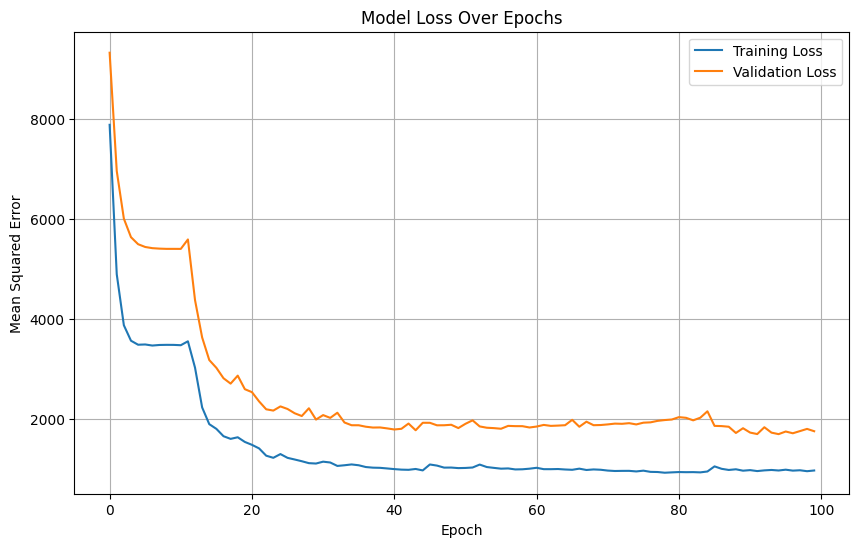

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
y_test

array([112.,  98.,  69.,  82.,  91.,  93.,  91.,  95., 111.,  96.,  97.,
       124.,  95., 107.,  83.,  84.,  50.,  28.,  87.,  16.,  57., 111.,
       113.,  20., 145., 119.,  66.,  97.,  90., 115.,   8.,  48., 106.,
         7.,  11.,  19.,  21.,  50., 142.,  28.,  18.,  10.,  59., 109.,
       114.,  47., 135.,  92.,  21.,  79., 114.,  29.,  26.,  97., 137.,
        15., 103.,  37., 114., 100.,  21.,  54.,  72.,  28., 128.,  14.,
        77.,   8., 121.,  94., 118.,  50., 131., 126., 113.,  10.,  34.,
       107.,  63.,  90.,   8.,   9., 137.,  58., 118.,  89., 116., 115.,
       136.,  28.,  38.,  20.,  85.,  55., 128., 137.,  82.,  59., 117.,
        20.])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 560.7262 
Test Loss (MSE): 529.2096557617188
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


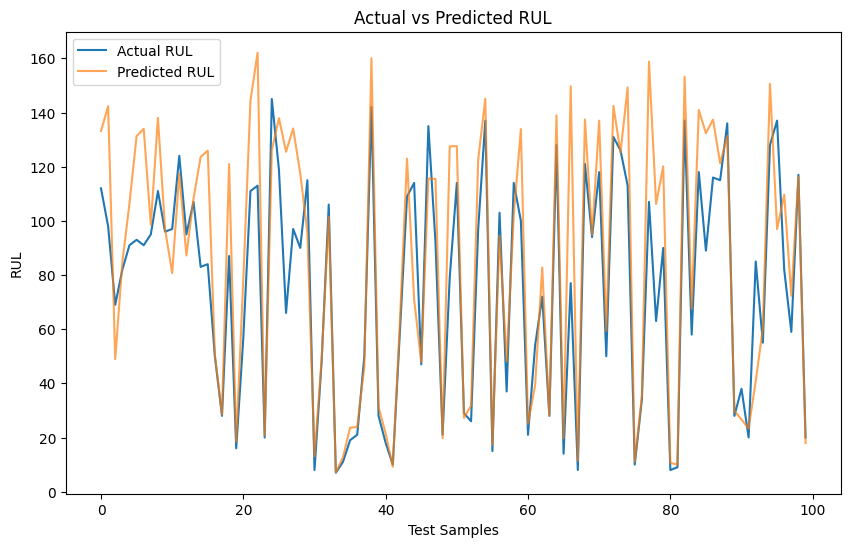

In [69]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

y_pred = model.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual RUL')
plt.plot(y_pred, label='Predicted RUL', alpha=0.7)
plt.title('Actual vs Predicted RUL')
plt.xlabel('Test Samples')
plt.ylabel('RUL')
plt.legend()
plt.show()


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")


RMSE: 23.004556264553024
MAE: 16.24329273223877


## Attention

In [71]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Attention, Concatenate


input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))


lstm1 = LSTM(50, return_sequences=True)(input_layer)
drop1 = Dropout(0.2)(lstm1)

attention = Attention()([drop1, drop1])

concat = Concatenate()([drop1, attention])

lstm2 = LSTM(50)(concat)
drop2 = Dropout(0.2)(lstm2)

output = Dense(1)(drop2)

att_model = Model(inputs=input_layer, outputs=output)
att_model.compile(optimizer='adam', loss='mean_squared_error')

att_model.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 30, 16)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 30, 50)    │     13,400 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 30, 50)    │          0 │ lstm_2[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 30, 50)    │          0 │ dropout_13[0][0], │
│ (Attention)         │                   │            │ dropout_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 30, 100)   │          0 │ dropout_13[0][0], │
│ (Concatenate)       │                   │            │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 50)        │     30,200 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 50)        │          0 │ lstm_3[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 1)         │         51 │ dropout_14[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 43,651 (170.51 KB)

 Trainable params: 43,651 (170.51 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
history_att = att_model.fit(X_train, y_train,
                            epochs=100,
                            batch_size=16,
                            validation_split=0.2,
                            shuffle=False,
                            verbose=1)

Epoch 1/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 9471.2852 - val_loss: 9384.5244
Epoch 2/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5467.9883 - val_loss: 6990.2837
Epoch 3/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 4048.8491 - val_loss: 6012.9844
Epoch 4/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 3584.5974 - val_loss: 5639.9551
Epoch 5/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 3461.7305 - val_loss: 5492.8247
Epoch 6/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 3416.3381 - val_loss: 5434.6675
Epoch 7/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 3430.7974 - val_loss: 5408.7876
Epoch 8/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 3420.5020 - val_loss: 5397.9268
Epoch 9/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 3398.5508 - val_loss: 5393.2070
Epoch 10/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 3415.0315 - val_loss: 5392.7974
Epoch 11/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 

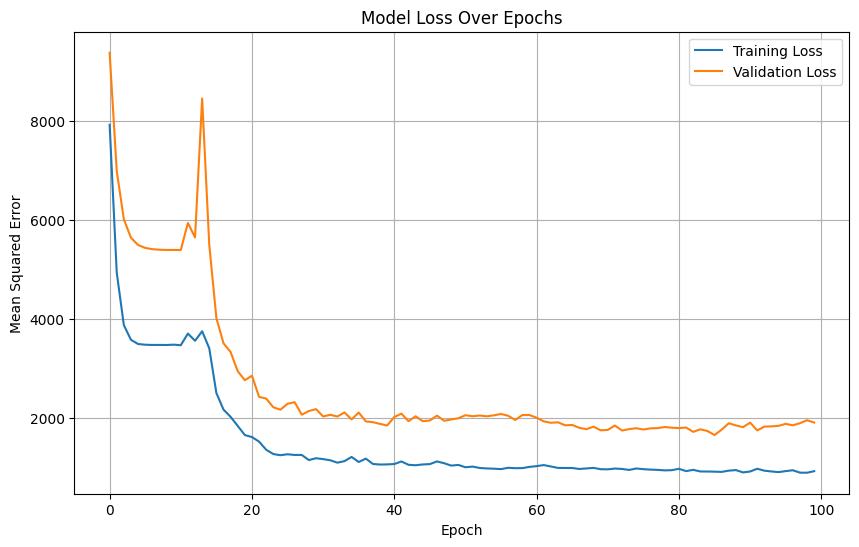

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(history_att.history['loss'], label='Training Loss')
plt.plot(history_att.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 685.7435
Test Loss (MSE): 682.1670532226562
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


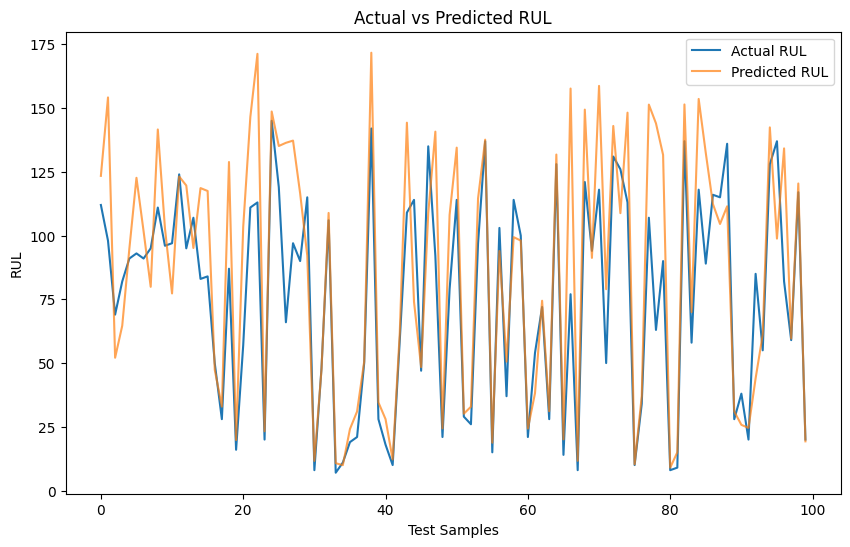

In [74]:
test_loss = att_model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

y_pred = att_model.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual RUL')
plt.plot(y_pred, label='Predicted RUL', alpha=0.7)
plt.title('Actual vs Predicted RUL')
plt.xlabel('Test Samples')
plt.ylabel('RUL')
plt.legend()
plt.show()


In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")


RMSE: 26.118327675774637
MAE: 18.358113403320313


## Multi head Attention + BiLSTM

In [76]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D


input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))


x = Bidirectional(LSTM(50, return_sequences=True))(input_layer)
x = Dropout(0.2)(x)


attn_output = MultiHeadAttention(num_heads=2, key_dim=64)(x, x)
attn_output = Dropout(0.1)(attn_output)
attn_output = LayerNormalization(epsilon=1e-6)(x + attn_output)


x = Bidirectional(LSTM(50, return_sequences=True))(attn_output)
x = Dropout(0.2)(x)


x = GlobalAveragePooling1D()(x)


output = Dense(1)(x)


model_bi_attn = Model(inputs=input_layer, outputs=output)
model_bi_attn.compile(optimizer='adam', loss='mean_squared_error')




In [77]:
history = model_bi_attn.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    shuffle=False,
    verbose=1
)

Epoch 1/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - loss: 7951.0181 - val_loss: 6725.0532
Epoch 2/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 3811.4805 - val_loss: 5580.5063
Epoch 3/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 3401.5632 - val_loss: 5399.8838
Epoch 4/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 3367.5107 - val_loss: 5366.5308
Epoch 5/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 3363.7300 - val_loss: 5359.6421
Epoch 6/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 3363.8218 - val_loss: 5358.4243
Epoch 7/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 3362.8962 - val_loss: 5358.3291
Epoch 8/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 3361.6570 - val_loss: 5358.5200
Epoch 9/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 3362.2402 - val_loss: 5358.4839
Epoch 10/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 3363.1062 - val_loss: 5358.4136
Epoch 11/100
882/882 ━━━━━━━━━━━━━━━━━━━━ 20s 15m

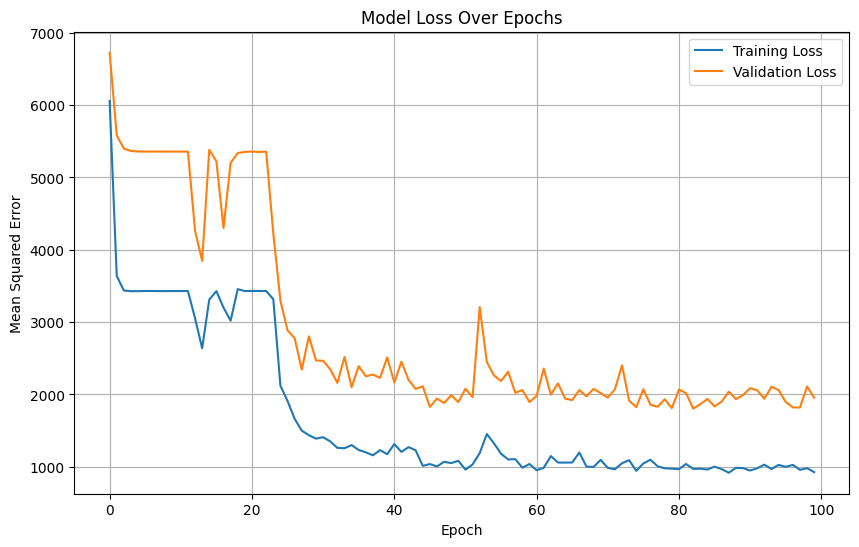

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 690.1205
Test Loss (MSE): 645.028076171875
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


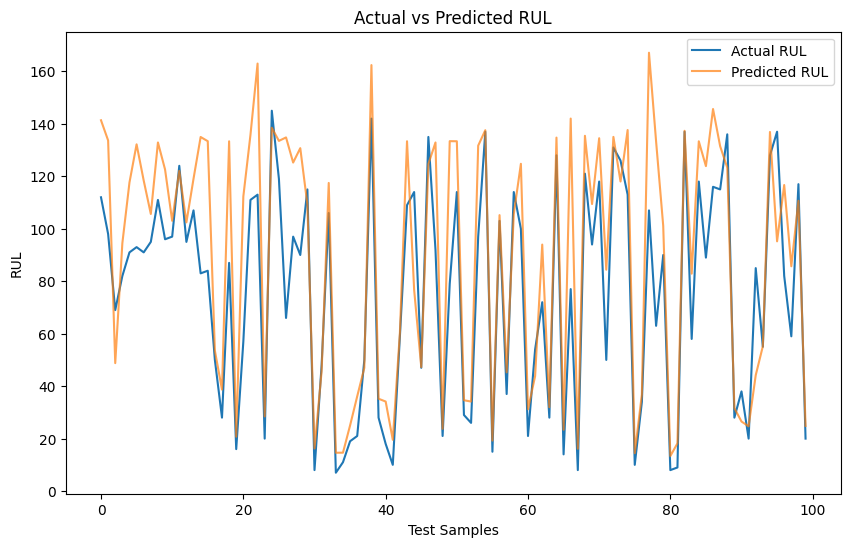

In [79]:
test_loss = model_bi_attn.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")

y_pred = model_bi_attn.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual RUL')
plt.plot(y_pred, label='Predicted RUL', alpha=0.7)
plt.title('Actual vs Predicted RUL')
plt.xlabel('Test Samples')
plt.ylabel('RUL')
plt.legend()
plt.show()


In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")


RMSE: 25.39740203783945
MAE: 18.806730346679686


## CNN + GRU

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(30, 16)),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.GRU(64, return_sequences=False),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 64)         │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 26, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 13, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,561 (166.25 KB)

 Trainable params: 42,561 (166.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import matplotlib.pyplot as plt

# Fit the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    verbose=1
)


Epoch 1/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 9534.6279 - mae: 79.3438 - val_loss: 6211.5605 - val_mae: 61.2032
Epoch 2/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 3388.9922 - mae: 46.9817 - val_loss: 3381.6348 - val_mae: 42.5522
Epoch 3/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 1649.4738 - mae: 30.5223 - val_loss: 2505.8921 - val_mae: 37.4572
Epoch 4/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 1417.1387 - mae: 27.4575 - val_loss: 2365.3945 - val_mae: 36.3201
Epoch 5/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 1298.0875 - mae: 26.1129 - val_loss: 2545.8203 - val_mae: 37.5953
Epoch 6/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 1287.6935 - mae: 25.7831 - val_loss: 2296.6006 - val_mae: 35.3806
Epoch 7/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 1238.8035 - mae: 25.0865 - val_loss: 2287.9587 - val_mae: 34.8333
Epoch 8/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 1101.9194 - mae: 23.4203 - val_loss: 2024.8973 - v

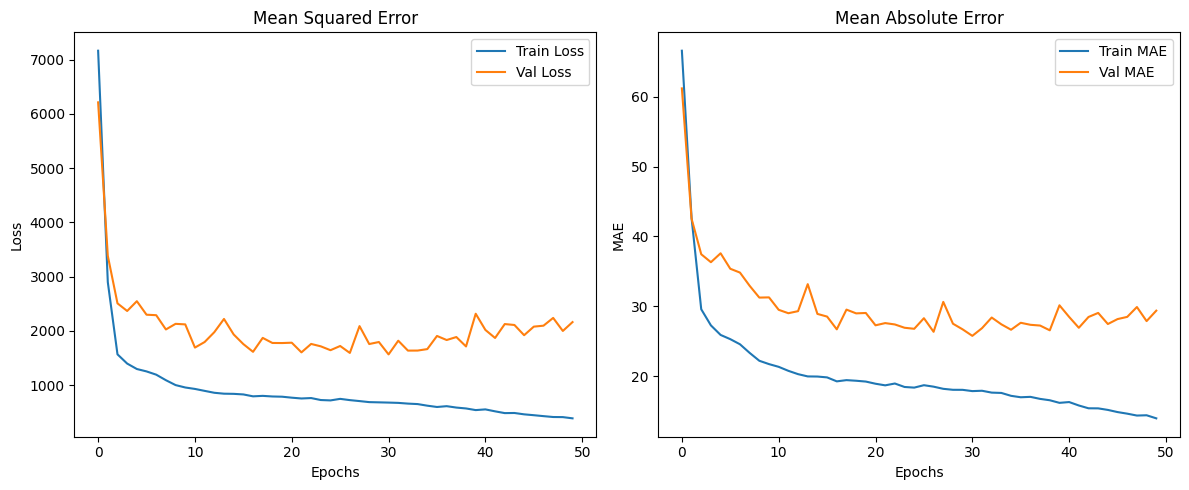

In [ ]:
# Plot loss and MAE over epochs
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Predict on test set
y_pred = model.predict(X_test).flatten()

# Evaluate test error
test_mse, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {test_mse:.2f}, Test MAE: {test_mae:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
Test MSE: 815.93, Test MAE: 18.17


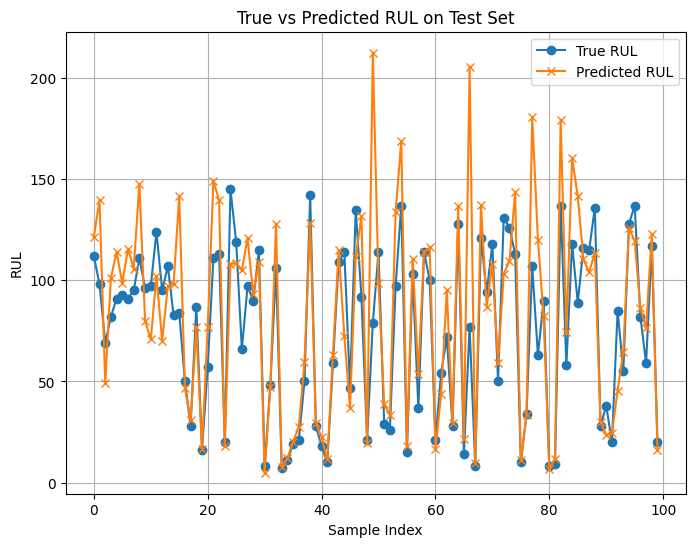

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='True RUL', marker='o')
plt.plot(y_pred, label='Predicted RUL', marker='x')
plt.title('True vs Predicted RUL on Test Set')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.grid(True)
plt.show()


## CNN + Transformer

In [60]:
import tensorflow as tf
from tensorflow.keras import layers, models, Model, Input, regularizers
import matplotlib.pyplot as plt

# Positional Encoding Layer
class PositionalEncoding(layers.Layer):
    def __init__(self, seq_len, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(seq_len, d_model)

    def get_angles(self, pos, i, d_model):
        angles = pos / tf.pow(10000., (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return angles

    def positional_encoding(self, seq_len, d_model):
        angle_rads = self.get_angles(
            pos=tf.range(seq_len, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model
        )
        sines = tf.math.sin(angle_rads[:, 0::2])
        cosines = tf.math.cos(angle_rads[:, 1::2])
        pos_encoding = tf.concat([sines, cosines], axis=-1)
        return pos_encoding[tf.newaxis, ...]

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

In [61]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x + inputs)

    ff = layers.Dense(ff_dim, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
    ff = layers.Dropout(dropout)(ff)
    ff = layers.Dense(inputs.shape[-1], kernel_regularizer=regularizers.l2(1e-4))(ff)
    return layers.LayerNormalization(epsilon=1e-6)(x + ff)

In [62]:
def build_cnn_transformer_model(seq_len=30, num_features=16):
    inputs = Input(shape=(seq_len, num_features))

    # CNN Block with dropout & regularization
    x = layers.Conv1D(64, kernel_size=3, activation='relu', padding='same',
                      kernel_regularizer=regularizers.l2(1e-4))(inputs)
    x = layers.Dropout(0.3)(x)
    x = layers.Conv1D(64, kernel_size=3, activation='relu', padding='same',
                      kernel_regularizer=regularizers.l2(1e-4))(x)

    # Positional Encoding
    x = PositionalEncoding(seq_len, 64)(x)

    # Transformer Block
    x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=128, dropout=0.1)

    # Global pooling
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1)(x)

    return Model(inputs, outputs)

model = build_cnn_transformer_model()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 30, 16)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 30, 64)    │      3,136 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 30, 64)    │          0 │ conv1d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 30, 64)    │     12,352 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_encodin… │ (None, 30, 64)    │          0 │ conv1d_5[0][0]    │
│ (PositionalEncodin… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 30, 64)    │     66,368 │ positional_encod… │
│ (MultiHeadAttentio… │                   │            │ positional_encod… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 30, 64)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 30, 64)    │          0 │ dropout_8[0][0],  │
│                     │                   │            │ positional_encod… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 30, 64)    │        128 │ add_4[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 30, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 30, 128)   │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 30, 64)    │      8,256 │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 30, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 30, 64)    │        128 │ add_5[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 64)        │      4,160 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 64)        │          0 │ dense_10[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │         65 │ dropout_10[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 102,913 (402.00 KB)

 Trainable params: 102,913 (402.00 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    verbose=1,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - loss: 8039.1626 - mae: 71.3367 - val_loss: 3682.2554 - val_mae: 42.4200 - learning_rate: 0.0010
Epoch 2/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 1793.7548 - mae: 31.0908 - val_loss: 2699.2964 - val_mae: 37.1942 - learning_rate: 0.0010
Epoch 3/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1482.5538 - mae: 27.9612 - val_loss: 2005.7506 - val_mae: 33.1021 - learning_rate: 0.0010
Epoch 4/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1318.6503 - mae: 25.7757 - val_loss: 1773.7739 - val_mae: 29.3679 - learning_rate: 0.0010
Epoch 5/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1196.4191 - mae: 23.9590 - val_loss: 2100.7256 - val_mae: 30.7268 - learning_rate: 0.0010
Epoch 6/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1124.9303 - mae: 23.2128 - val_loss: 1633.6694 - val_mae: 27.5338 - learning_rate: 0.0010
Epoch 7/200
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1062.5402 - mae: 22.4483 - val_

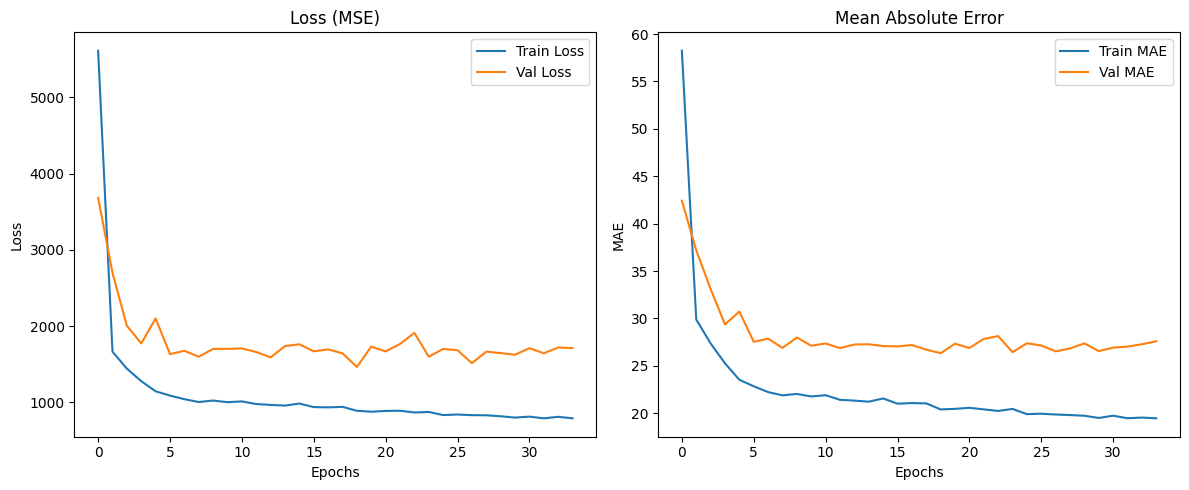

In [64]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step
Test MSE: 696.84, Test MAE: 19.88


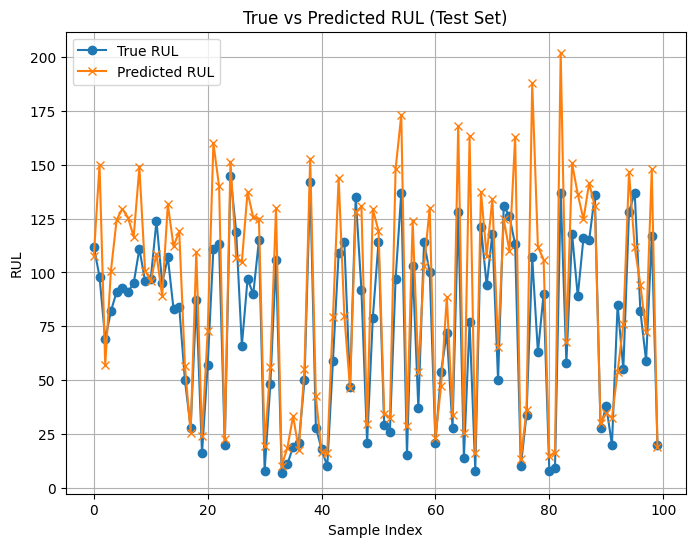

In [65]:
y_pred = model.predict(X_test).flatten()
test_mse, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {test_mse:.2f}, Test MAE: {test_mae:.2f}")

# Plot predictions
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='True RUL', marker='o')
plt.plot(y_pred, label='Predicted RUL', marker='x')
plt.title('True vs Predicted RUL (Test Set)')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.grid(True)
plt.show()